In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

In [5]:
train_data_dir = 'tun_kun/training/'
test_data_dir  = 'tun_kun/test/'

In [30]:
def load_dataset(path):
    rasmlar = []
    turlari = ['day', 'night']
    for i in turlari:
        for rasm_path in glob.glob(os.path.join(path, i,'*')):
            rasm = cv2.imread(rasm_path)
            rasm = cv2.cvtColor(rasm, cv2.COLOR_BGR2RGB)
            rasmlar.append((rasm,i))
    return rasmlar

In [31]:
train_rasmlar = load_dataset(train_data_dir)
test_rasmlar  = load_dataset(test_data_dir) 
print(len(train_rasmlar), len(test_rasmlar))

240 160


In [32]:
train_rasmlar.extend(test_rasmlar)

In [33]:
len(train_rasmlar)

400

In [34]:
y_size = [i[0].shape[0] for i in train_rasmlar]
x_size = [i[0].shape[1] for i in train_rasmlar]

In [35]:
x_mean = np.mean(x_size)
y_mean = np.mean(y_size)
print(x_mean, y_mean)

856.0675 568.1525


In [36]:
def birxil(rasm):
    rasm = cv2.resize(rasm,(860, 570))
    return rasm

In [37]:
def encode(target):
    if target == 'day':
        return 1
    else:
        return 0

In [38]:
def preprocessing(rasmlar):
    tayyor_rasmlar = []
    for i in rasmlar:
        tayyor_rasmlar.append((birxil(i[0]), encode(i[1])))
    return tayyor_rasmlar

In [39]:
tayyor_rasmlar = preprocessing(train_rasmlar)

In [52]:
def hsv_v_ni_olish(rasmlar):
    rasmlar_hsv = []
    for i in rasmlar:
        rasm = cv2.cvtColor(i[0],cv2.COLOR_RGB2HSV)
        rasm = rasm[:,:,2]
        rasmlar_hsv.append((rasm,i[1]))
    return rasmlar_hsv

In [53]:
tayyor_rasmlar = hsv_v_ni_olish(preprocessing(train_rasmlar))

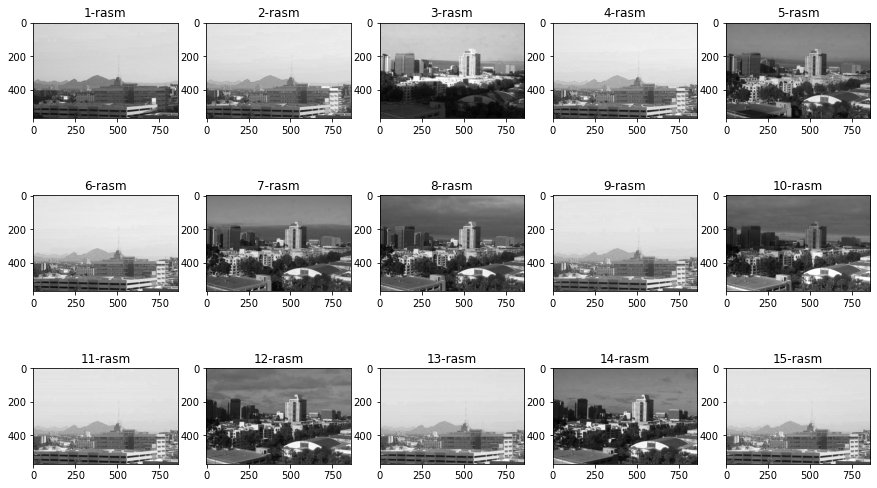

In [54]:
fig,axes = plt.subplots(3,5,figsize=(15,9))

s = 0
for i in range(3):
    for j in range(5):
        axes[i][j].set_title(f"{s+1}-rasm")
        axes[i][j].imshow(tayyor_rasmlar[s][0],cmap="gray")
        s+=1
plt.show()


In [56]:
train, test = split_dataset(tayyor_rasmlar,nisbat=0.4)

In [55]:
def split_dataset(rasmlar,nisbat=0.2):
    train = []
    test = []
    for i in range(int(len(rasmlar)*(1-nisbat))):
        train.append(rasmlar[i])
    for i in range(int(len(rasmlar)*(1-nisbat)),len(rasmlar)):
        test.append(rasmlar[i])
    return train, test

In [58]:
train_sum = np.array([np.sum(i[0]) for i in train])
train_sum

array([85829493, 94562236, 64776832, 97915665, 53901233, 98049270,
       54973569, 50642244, 97106019, 51095043, 96790289, 51718735,
       95637499, 53148277, 95808863, 52769977, 96479640, 93758304,
       54729963, 89083850, 54066876, 92010647, 53451137, 92297294,
       54045986, 92954778, 52627714, 93888940, 51767127, 50672521,
       71330217, 80300726, 78550866, 60595368, 77456671, 74656666,
       77144386, 51009668, 76135354, 63646382, 68061177, 63561779,
       73242678, 63593256, 63349989, 62772363, 54534383, 62717385,
       75506669, 69117007, 61681028, 76059953, 62115095, 62743561,
       63392916, 80664641, 62947502, 70425303, 64592854, 72931429,
       64206848, 63494425, 62659362, 53485266, 63043859, 67689577,
       52354662, 67067034, 55027185, 75587903, 62297863, 48031905,
       76974240, 70059693, 46349759, 77811381, 70625529, 52287733,
       78052544, 69867953, 53963036, 78327807, 50043424, 56387684,
       65371033, 58940194, 67131079, 56996253, 64164321, 55366

In [59]:
train_sum_kun = np.array([train_sum[i] for i in range(len(train)) if train[i][1]==1])

In [60]:
train_sum_kun


array([85829493, 94562236, 64776832, 97915665, 53901233, 98049270,
       54973569, 50642244, 97106019, 51095043, 96790289, 51718735,
       95637499, 53148277, 95808863, 52769977, 96479640, 93758304,
       54729963, 89083850, 54066876, 92010647, 53451137, 92297294,
       54045986, 92954778, 52627714, 93888940, 51767127, 50672521,
       71330217, 80300726, 78550866, 60595368, 77456671, 74656666,
       77144386, 51009668, 76135354, 63646382, 68061177, 63561779,
       73242678, 63593256, 63349989, 62772363, 54534383, 62717385,
       75506669, 69117007, 61681028, 76059953, 62115095, 62743561,
       63392916, 80664641, 62947502, 70425303, 64592854, 72931429,
       64206848, 63494425, 62659362, 53485266, 63043859, 67689577,
       52354662, 67067034, 55027185, 75587903, 62297863, 48031905,
       76974240, 70059693, 46349759, 77811381, 70625529, 52287733,
       78052544, 69867953, 53963036, 78327807, 50043424, 56387684,
       65371033, 58940194, 67131079, 56996253, 64164321, 55366

In [61]:
train_sum_tun = np.array([train_sum[i] for i in range(len(train)) if train[i][1]==0])
train_sum_tun

array([16547353, 16180146, 14935859, 14420254, 12773001, 12568609,
       12557793, 12608903, 12646847, 12582969, 13634957, 23171422,
       23738313, 23681961, 12677652, 23874165,  4014789, 13569021,
       58625549,  4135585,  6758431, 12605566, 54090552,  4071260,
        6740448, 12633031, 53662045,  3976591,  7058955, 53421640,
        6500671,  7125135, 55507047,  6849768, 56033368, 55319661,
       56312292, 56239941, 55389174, 13674317, 56066939, 14244573,
       55714026, 13203883, 54648823, 53981401, 35118161, 53651092,
       10364426, 35392166, 53807787, 12368791, 35289276, 53182492,
       12010359, 35943722, 11925477, 35566573, 12120735, 11225392,
       17628127, 48674552, 17728197, 48410724, 48513060, 50177564,
       48383307, 48661469, 48560927, 48689608, 17255553, 48644333,
       48514876, 49784440, 48562941, 48544884, 48608971, 48774738,
       19268750, 48828365, 48924801, 50366279, 48588153, 48718121,
       48378381, 18406493, 47483539, 43336134, 46608865, 47497

In [63]:
kun_mal = {
    "Kun min" : train_sum_kun.min(),
    "Kun mean" : np.around(train_sum_kun.mean(),0),
    "Kun max" : train_sum_kun.max()
}
kun_mal

{'Kun min': 46349759, 'Kun mean': 67319225.0, 'Kun max': 98049270}

In [64]:
tun_mal = {
    "Tun min" : train_sum_tun.min(),
    "Tun mean" : np.around(train_sum_tun.mean(),0),
    "Tun max" : train_sum_tun.max()
}
tun_mal

{'Tun min': 3976591, 'Tun mean': 33906698.0, 'Tun max': 58625549}

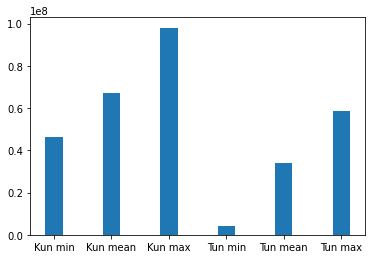

In [65]:
y=[kun_mal["Kun min"],kun_mal["Kun mean"],kun_mal["Kun max"],tun_mal["Tun min"],tun_mal["Tun mean"],tun_mal["Tun max"],]
x=["Kun min","Kun mean","Kun max","Tun min","Tun mean","Tun max"]
plt.bar(x,y,width = 0.3)
plt.show()

In [66]:
mean_diff = kun_mal['Kun mean'] - tun_mal["Tun mean"]
mean_diff

33412527.0

In [67]:
line_diff = mean_diff/2
line_diff

16706263.5

In [68]:
line = tun_mal["Tun mean"] + line_diff
line


50612961.5

In [69]:
rasm_size = train[0][0].shape[0] * train[0][0].shape[1]
rasm_size

490200

In [70]:
line_normal = line / rasm_size
line_normal

103.2496154630763

In [71]:
def mean_rasm(rasmlar):
    mean_rasmlar = []
    for i in rasmlar:
        mean_rasmlar.append((np.mean(i[0]),i[1]))
        
    return mean_rasmlar

In [72]:
test = mean_rasm(test)

In [73]:
test[:10]

[(194.22486332109344, 1),
 (157.8330375356997, 1),
 (201.6063769889841, 1),
 (191.23770297837618, 1),
 (188.11746022031824, 1),
 (185.9164075887393, 1),
 (183.71721338229295, 1),
 (184.66676254589964, 1),
 (161.98744798041616, 1),
 (157.65057527539778, 1)]

In [74]:
def testing(rasmlar):
    S=0
    for i in rasmlar:
        if line_normal < i[0]:
            target = 1
        else:
            target = 0
        
        if target != i[1]:
            S+=1
    return S

In [75]:
xatolik = testing(test)

In [76]:
aniqlik = 100 - (xatolik / len(test)) * 100

In [77]:
aniqlik

92.5